Correlation between Starbucks and Chain Density for Census Tracts
===================================

I wanted to see if, just based on yelp data, I could find any correlation between starbucks
counts in a tract and percentage of businesses that are chains.

Methodology
-----------

Look at value counts for business names in the Yelp data set to develop criteria for a business being a chain/big-box based on numer of occourances of the business name.

I settled on minimum name count of 5 to be considered a chain, even though there were
clearly some chains that had fewer than 5 instances in the yelp data set.

I plotted chain fraction vs starbucks count.  (I excluded Starbucks from businesses when computing the Yelp chain fraction.)

Results
-------

As can be seen from the figure at the end of this notebook, there is no apparent correlation between Starbucks count in a Census tract and the fraction of chain references.

Note that I tried a number of chain criteria and different cutoffs did not effect the lack of correlation.



In [7]:
%pylab inline
import pandas as pd
import json
bus = pd.DataFrame(json.loads(l) for l in open('yelp/business.json'))
bus_counts = pd.DataFrame(bus.name.value_counts())
bus_counts.columns = ['counts']

Populating the interactive namespace from numpy and matplotlib


In [8]:
bus_counts['chain'] = bus_counts['counts'].apply(lambda c: 1 if c >= 5 else 0)

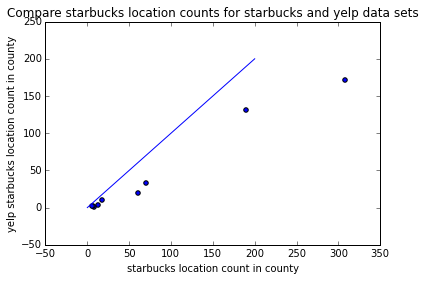

In [9]:
buswc = bus.merge(bus_counts, left_on='name', right_index=True)
import json
join = pd.DataFrame(json.loads(l) for l in open('business_county.json'))
busg = buswc.merge(join)
yelp_starbucks = busg[busg['name'] == 'Starbucks'].GISJOIN.value_counts()
yelp_starbucks = pd.DataFrame(yelp_starbucks, columns=['yelp_starbucks'])
starbucks = pd.DataFrame(json.loads(l) for l in open('sb_county.json')).GISJOIN.value_counts()
starbucks = pd.DataFrame(starbucks, columns=['starbucks'])
yelp_starbucks = yelp_starbucks.merge(starbucks, left_index=True, right_index=True)
from matplotlib import pyplot
pyplot.scatter(yelp_starbucks.starbucks, yelp_starbucks.yelp_starbucks)
pyplot.plot([0,200], [0,200])
ax = pyplot.gca()
ax.set_xlabel("starbucks location count in county")
ax.set_ylabel("yelp starbucks location count in county")
ax.set_title("Compare starbucks location counts for starbucks and yelp data sets")

Obviously, not all starbucks are in yelp.

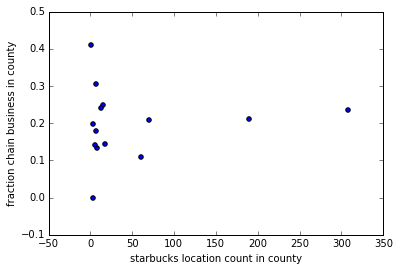

In [11]:
chain = busg[busg['name'] != 'Starbucks'][['chain']].groupby(busg.GISJOIN).mean()
chain = chain.merge(starbucks, left_index=True, right_index=True)
chain = chain[chain.starbucks > 0]
pyplot.scatter(chain.starbucks, chain['chain'])
ax = pyplot.gca()
ax.set_xlabel("starbucks location count in county")
ax.set_ylabel("fraction chain business in county")